<a href="https://colab.research.google.com/github/VictorSepulveda1994/Minor-Machine-Learning/blob/main/Validaci%C3%B3n%20Cruzada/Cross_Validation_Penguin_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link del repositorio en github: https://github.com/VictorSepulveda1994/Minor-Machine-Learning/tree/main/Validaci%C3%B3n%20Cruzada

# Librerías y Dataset

In [512]:
# Se importan las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

In [513]:
# Se utiliza el link de los datos en crudo del dataset 'penguins_size.csv'
url = 'https://raw.githubusercontent.com/VictorSepulveda1994/Minor-Machine-Learning/main/Validaci%C3%B3n%20Cruzada/penguins_size.csv'
df = pd.read_csv(url)
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# Entendiendo los Datos

In [514]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


El conjunto de datos consiste en 7 columnas:
* **species**: especie del pingüino (Chinstrap, Adélie o Gentoo).
* **island**: nombre de la isla (Dream, Torgersen, or Biscoe) en el Archipiélago Palmer (Antártica).
* **culmen_length_mm**: longitud del culmen (mm).
* **culmen_depth_mm**: profundidad del culmen (mm).
* **flipper_length_mm**: longitud de la aleta (mm).
* **body_mass_g**: masa corporal (g).
* **sex**: sexo del pingüino.

In [515]:
print(df.shape)

(344, 7)


Existen 344 filas (entradas) y 7 columnas (cabeceras).

In [516]:
# Para ver algunas métricas de las columnas
df.describe(include="all")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [517]:
# Para identificar los valores únicos en cualquier columna
df['sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

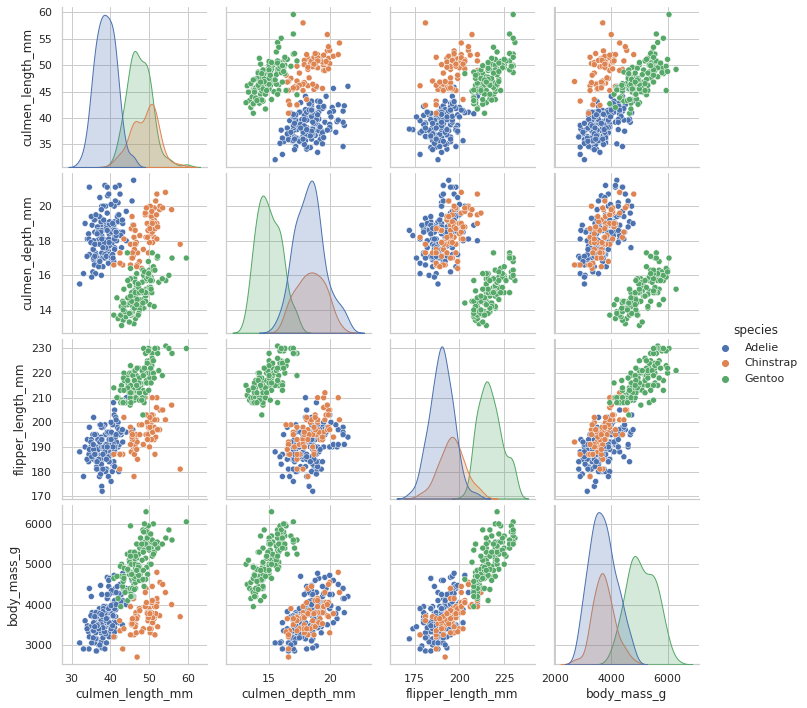

In [518]:
# Para identificar las variables numéricas más representativas y que distinguen mejor las especies
sns.pairplot(df,hue='species')
plt.show()

culmen_length y flipper_length permiten una mejor clasificación de las especies.

# Solucionando Errores del Dataset

## Manejo de valores faltantes

In [519]:
# Se reemplazan las filas nulas/basura de la columna 'sex' por su moda
mode_sex = df['sex'].mode()[0]
print(mode_sex)
df['sex'].fillna(mode_sex,inplace=True)
df['sex'] = df['sex'].str.replace(".",mode_sex)

MALE


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


In [520]:
# Se rellenan los valores nulos de culmen_length_mm, culmen_depth_mm, flipper_length_mm y body_mass_g por sus medias agrupadas por especies.
df['culmen_length_mm'].fillna(df.groupby('species')['culmen_length_mm'].transform('mean'),inplace=True)
df['culmen_depth_mm'].fillna(df.groupby('species')['culmen_depth_mm'].transform('mean'),inplace=True)
df['flipper_length_mm'].fillna(df.groupby('species')['flipper_length_mm'].transform('mean'),inplace=True)
df['body_mass_g'].fillna(df.groupby('species')['body_mass_g'].transform('mean'),inplace=True)

In [521]:
# Métricas después de manejar los valores vacíos
df.describe(include="all") 

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,344.000000,344.000000,344.000000,344.000000,344
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,179
mean,NaN,NaN,43.917431,17.148339,200.930641,4202.839182,NaN
std,NaN,NaN,5.454118,1.973561,14.060613,801.461347,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.200000,15.575000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.250000,4756.250000,NaN


Ahora, en la fila 'count' todas la columnas poseen 344 entradas.

In [522]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.100000,18.700000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.500000,17.400000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.300000,18.000000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,38.791391,18.346358,189.953642,3700.662252,MALE
4,Adelie,Torgersen,36.700000,19.300000,193.000000,3450.000000,FEMALE


## Conversiones de Columnas

In [523]:
# Se convierte la columna 'species' a tipo 'category' para mejorar la clasificación.
df['species'] = df['species'].astype('category')
df['species'] = df['species'].cat.codes
df['species'].unique()

array([0, 1, 2], dtype=int8)

In [524]:
# Se convierte la columna 'island' a tipo 'category' para mejorar la clasificación.
df['island'] = df['island'].astype('category')
df['island'] = df['island'].cat.codes
df['island'].unique()

array([2, 0, 1], dtype=int8)

In [525]:
# Se convierte la columna 'sex' a tipo 'category' para mejorar la clasificación.
df['sex'] = df['sex'].astype('category')
df['sex'] = df['sex'].cat.codes
df['sex'].unique()

array([1, 0], dtype=int8)

In [526]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.100000,18.700000,181.000000,3750.000000,1
1,0,2,39.500000,17.400000,186.000000,3800.000000,0
2,0,2,40.300000,18.000000,195.000000,3250.000000,0
3,0,2,38.791391,18.346358,189.953642,3700.662252,1
4,0,2,36.700000,19.300000,193.000000,3450.000000,0


# Modelado

A partir del diagrama de pares, parece que culmen_length y flipper_length permiten una mejor clasificación de las especies.

In [527]:
# Se dejan las columnas numéricas que permiten una mejor clasificación de las especies de pingüinos, como se vió en el gráfico de la primera sección
X =  df.drop(['species','culmen_depth_mm','body_mass_g'],axis=1)
X

,island,culmen_length_mm,flipper_length_mm,sex
0,2,39.100000,181.000000,1
1,2,39.500000,186.000000,0
2,2,40.300000,195.000000,0
3,2,38.791391,189.953642,1
4,2,36.700000,193.000000,0
...,...,...,...,...
339,0,47.504878,217.186992,1
340,0,46.800000,215.000000,0
341,0,50.400000,222.000000,1
342,0,45.200000,212.000000,0


In [528]:
# Se define la clase
y  = df['species']
y

0      0
1      0
2      0
3      0
4      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: species, Length: 344, dtype: int8

In [529]:
# Se dividen los datos en 'training' y 'testing' (70-30 respectivamente)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=42)

In [530]:
knn2 = KNeighborsClassifier()
# Se crea el diccionario de vecinos con k desde 1 a 5
vecinos = {'n_neighbors': np.arange(1, 6)}
# Se utiliza validación cruzada con cv=10
knn_cv = GridSearchCV(knn2, vecinos, cv=10)
# Se entrena el modelo
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5])})

In [531]:
# Se obtienen los valores de los mejores resultados del entrenamiento
print("Certeza promedio para cada valor de K (1,2,3,4,5):" , knn_cv.cv_results_['mean_test_score'])
print("Mejores parámetros:",knn_cv.best_params_)
print("Mejor certeza promedio:",knn_cv.best_score_)
print("Desviación Estándar:",knn_cv.cv_results_['std_test_score'][2])

Certeza promedio para cada valor de K (1,2,3,4,5): [0.94583333 0.95       0.9625     0.95416667 0.95416667]
Mejores parámetros: {'n_neighbors': 3}
Mejor certeza promedio: 0.9625
Desviación Estándar: 0.04350127712046063


# Pruebas

In [532]:
y_prediccion = knn_cv.predict(X_test)
print("Matriz de Confusión:\n",confusion_matrix(y_test,y_prediccion))
print("\nPuntuación de precisión:",accuracy_score(y_test,y_prediccion))

Matriz de Confusión:
 [[45  0  1]
 [ 2 19  0]
 [ 0  0 37]]

Puntuación de precisión: 0.9711538461538461
